## The  Problem Statement (Business Case)

Problem: Hiring process is extremly expensive and time consuming (companies spend 15-20 % of the employees salary to recruit a new candidate).  Hiring a new employee costs an average of 7645 (0-500 corporation). It takes 52 days on average to fill a position.

Task: The HR team collected extensive data on their employees and approached you to develop a model that could predict which employeess are more likely to quit.

DataSource: https://www.kaggle.com/pavansubhast/ibm-hr-analytics-attrition-dataset

## Load the Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
sns.set()

In [4]:
df = pd.read_csv('Human_Resources.csv')

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.shape

(1470, 35)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
df.duplicated().sum()

0

# Preliminary Data Exploration

In [10]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [11]:
# Replace Yes/No columns with integers
df['Attrition'] = df['Attrition'].apply(lambda x:1 if x == 'Yes' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x:1 if x == 'Yes' else 0)
df['Over18'] = df['Over18'].apply(lambda x:1 if x == 'Y' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x:1 if x == 'Yes' else 0)

In [12]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,0,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7


## Features visualisation

### Distribution

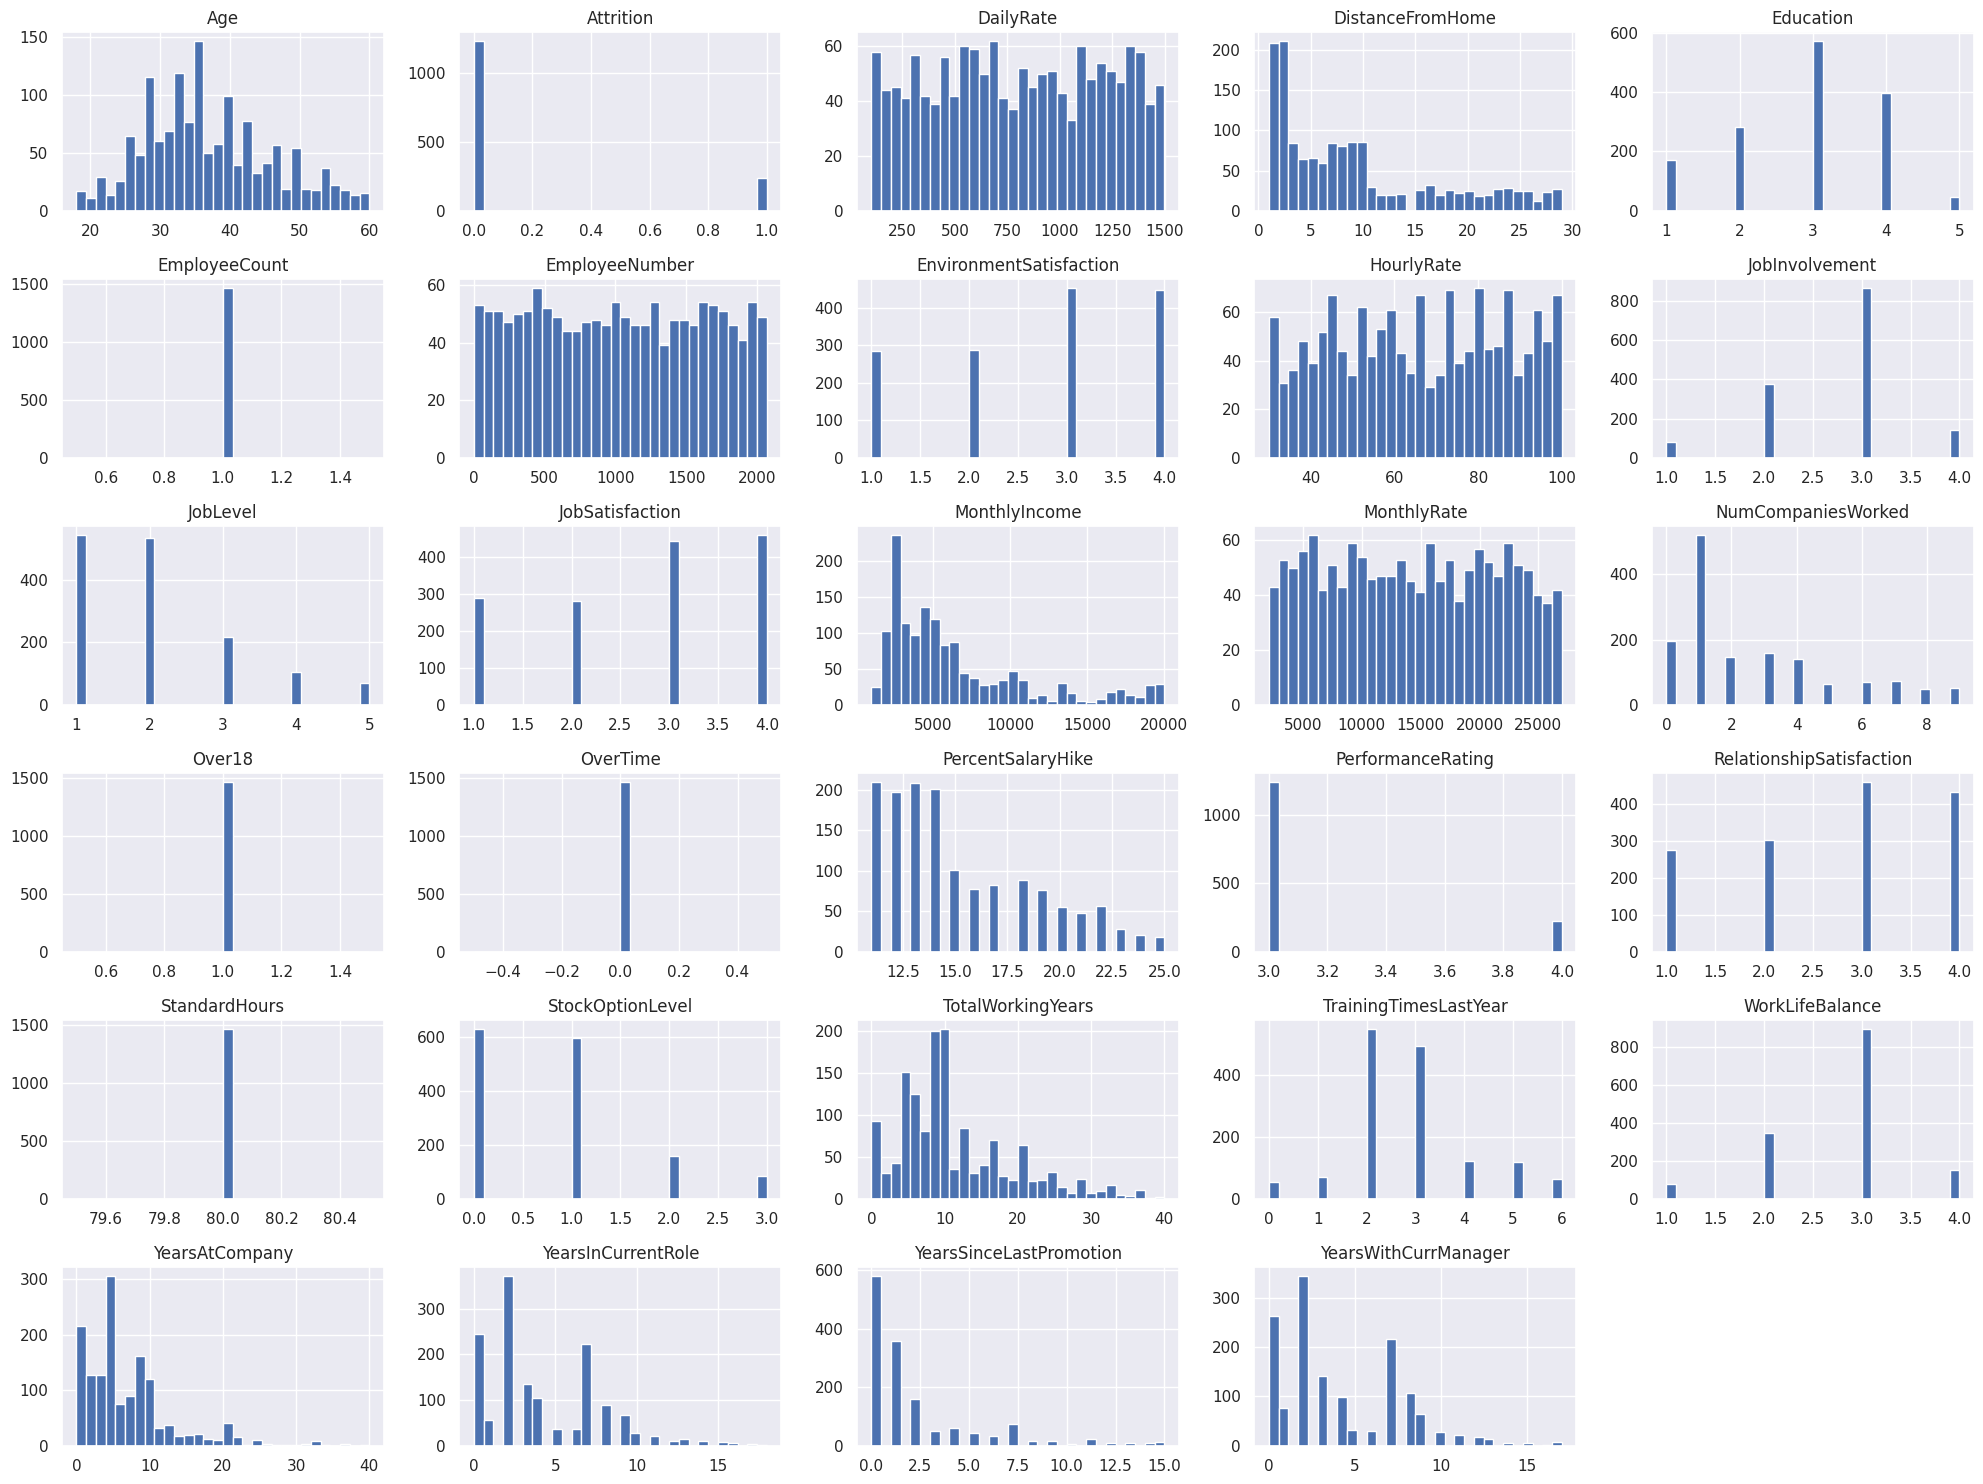

In [13]:
df.hist(bins=30, figsize=(20,15))
plt.tight_layout()
plt.show()

Certain features, like 'MonthlyIncome' and 'TotalWorkingYears', have a heavy tail distribution

In [14]:
# Let's drop 'EmployeeCount', 'StandardHours', 'Over18', and 'EmployeeNumber' because these columns remain constant across employees.

df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber', 'OverTime'], axis=1, inplace=True)

In [15]:
df.shape

(1470, 30)

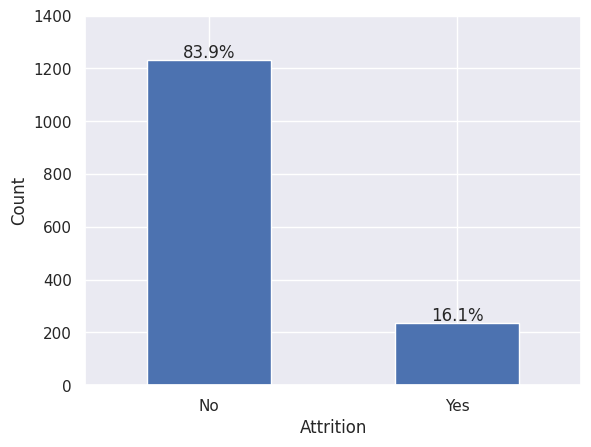

In [16]:
#  Let's examine the number of employees who left the company
ax = df['Attrition'].value_counts().plot(
    kind='bar',
    ylabel='Count'
)

# Correct the tick labels to show "Yes" and "No" instead of 1 and 0
ax.set_xticklabels(['No', 'Yes'], rotation=0)
ax.set_ylim(0, 1400)

# Add percentage labels on top of each bar
total = len(df)
for p in ax.patches:
    percentage = f'{(p.get_height() / total) * 100:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

### Correlation between features

In [17]:
!pip install phik
import phik

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 11.9 MB/s eta 0:00:00


interval columns not set, guessing: ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


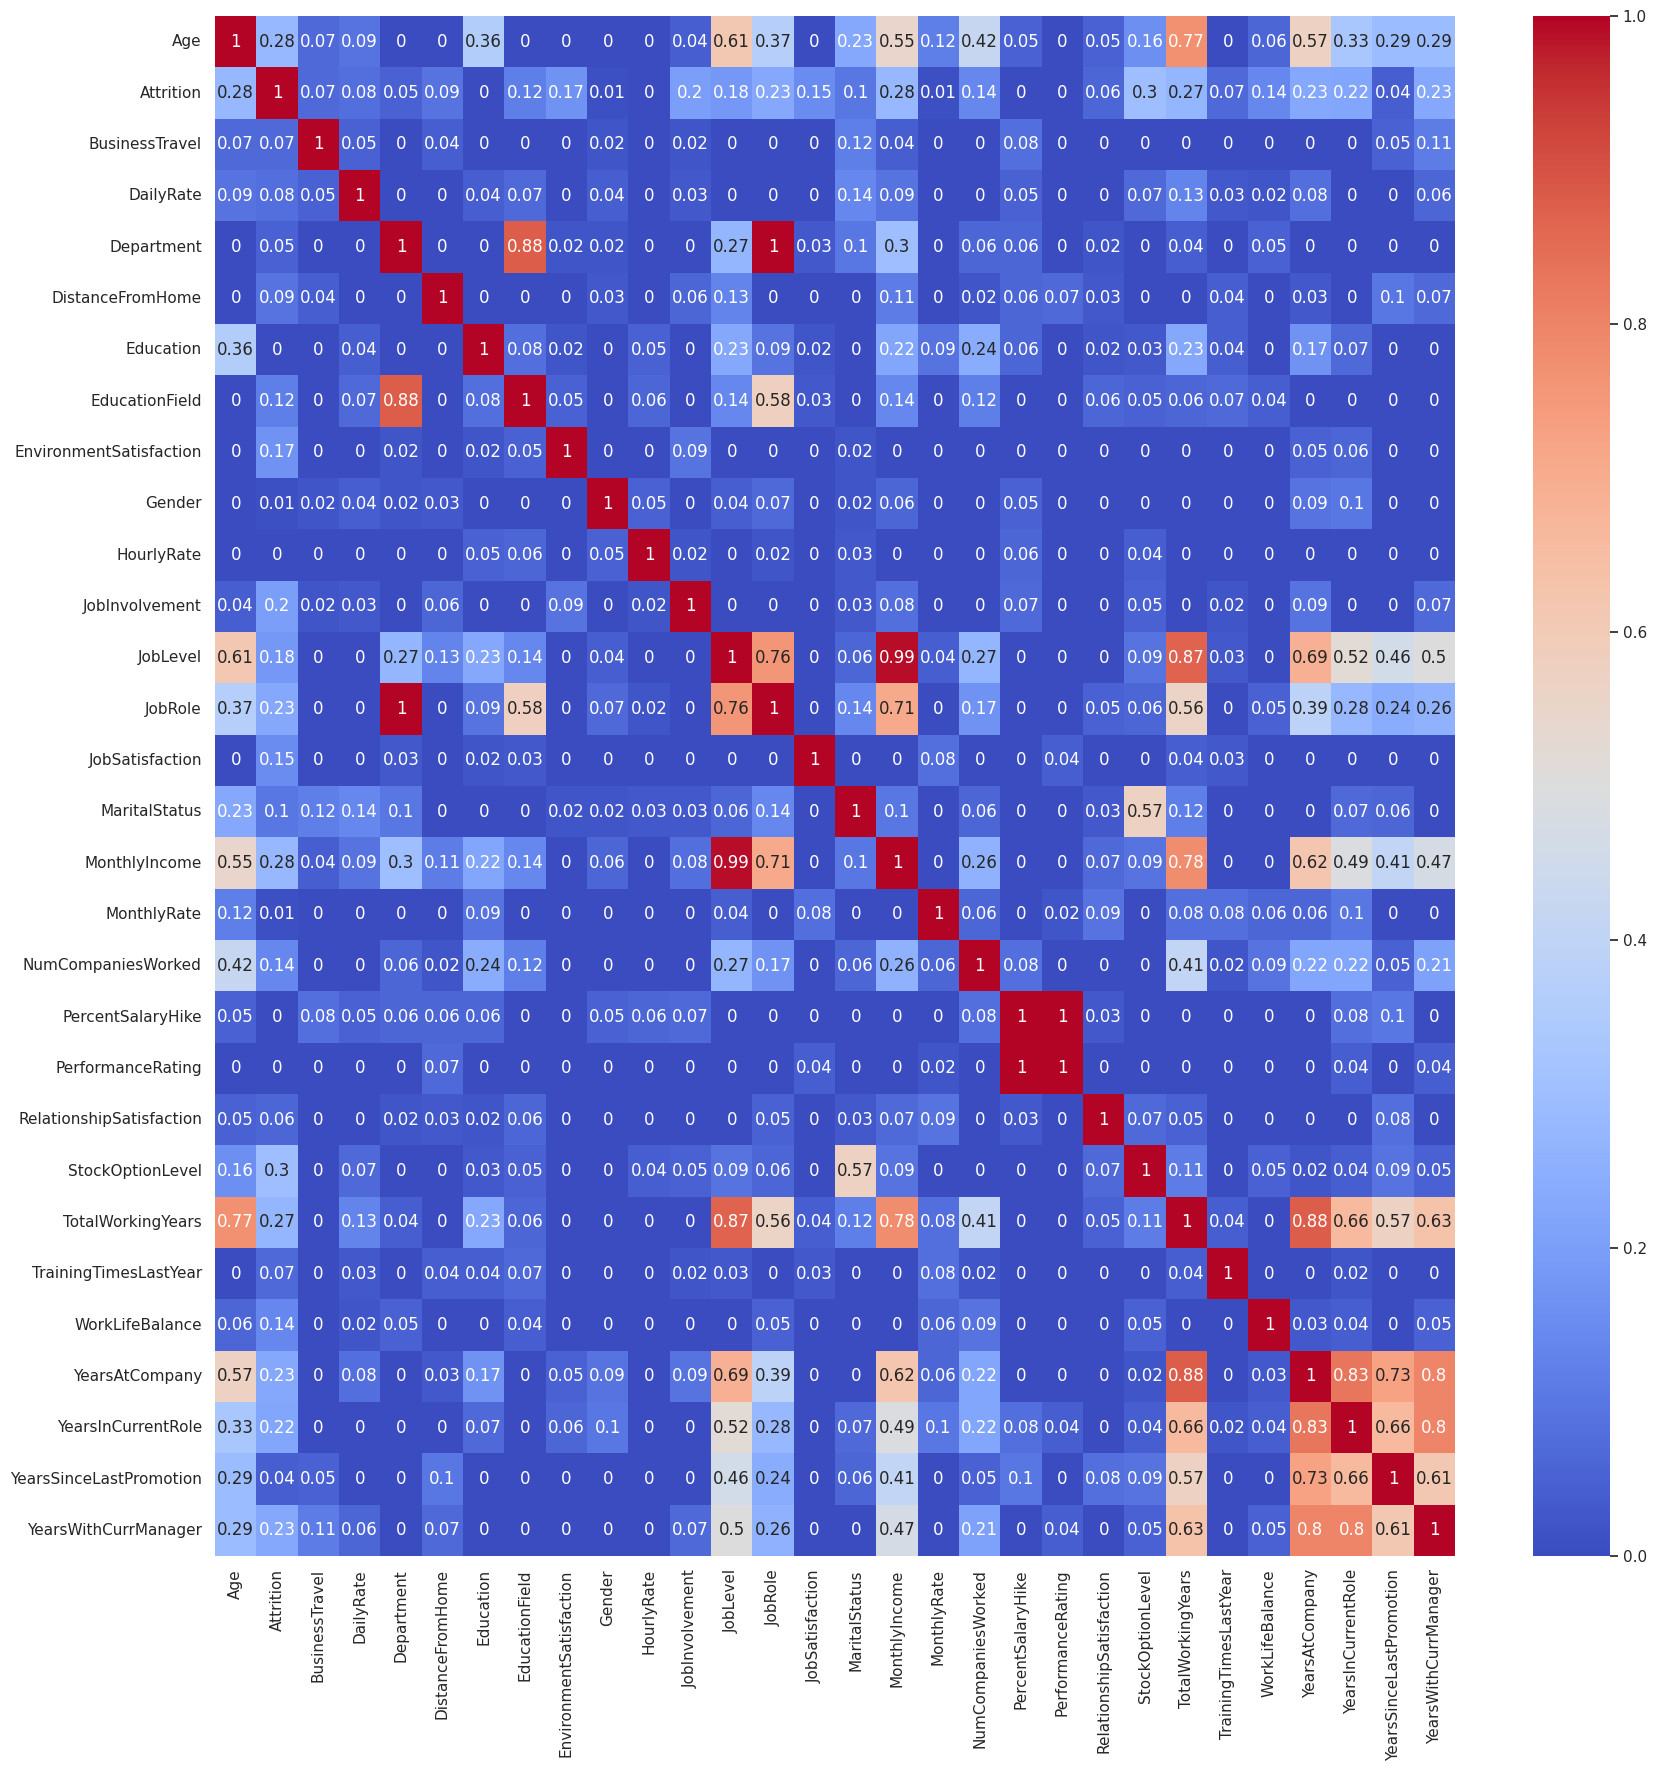

In [18]:
plt.figure(figsize=(20, 20))
corr = df.phik_matrix()
sns.heatmap(corr.round(2), annot=True, cmap='coolwarm')
plt.show()

- **Job level shows a strong correlation with Total Working Years (0.87) and Years at Company (0.69).**
- **Monthly income is highly correlated with Job Level (0.99), Job Role (0.71), and Total Working Years (0.78).**
- **Age has a strong correlation with both Total Working Years(0.77) and Job Level(0,61).**
- **Department is strongly correlated with Job Role (1) and Education Field (0.88).**
- **Education Field has a moderate correlation with Job Role (0.58).**

**Categories such as Years at Company, Years in Current Role, Years Since Last Promotion, and Years with Current Manager exhibit strong correlations with each other.**

### Differences between samples of retained and attrited employees

In [19]:
# Create 2 different df
quit_df = df[df['Attrition'] == 1]
stayed_df = df[df['Attrition'] == 0]

In [20]:
quit_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [21]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [22]:
print(f"Average age of remained employees: {stayed_df['Age'].mean():.1f},\nAverage age of attrited employees: {quit_df['Age'].mean():.1f}")

Average age of remained employees: 37.6,
Average age of attrited employees: 33.6


**This indicates that employees who remained with the company are, on average, older than those who left.**

In [23]:
print(f"Average DailyRate of remained employees: {stayed_df['DailyRate'].mean():.1f},\nAverage DailyRate of attrited employees: {quit_df['DailyRate'].mean():.1f}")

Average DailyRate of remained employees: 812.5,
Average DailyRate of attrited employees: 750.4


**This suggests that employees who remained with the company had a higher average DailyRate compared to those who  attrited.**

In [24]:
print(f"Average DistanceFromHome of remained employees: {stayed_df['DistanceFromHome'].mean():.1f},\nAverage DistanceFromHome of attrited employees: {quit_df['DistanceFromHome'].mean():.1f}")

Average DistanceFromHome of remained employees: 8.9,
Average DistanceFromHome of attrited employees: 10.6


**Employees who left the company tended to live farther from the workplace on average compared to those who remained**

In [25]:
print(f"Average EnvironmentSatisfaction of remained employees: {stayed_df['EnvironmentSatisfaction'].mean():.1f},\nAverage EnvironmentSatisfaction of attrited employees: {quit_df['EnvironmentSatisfaction'].mean():.1f}")

Average EnvironmentSatisfaction of remained employees: 2.8,
Average EnvironmentSatisfaction of attrited employees: 2.5


 **Employees who remained with the company reported slightly higher satisfaction with their work environment compared to those who left**

In [26]:
print(f"Average StockOptionLevel of remained employees: {stayed_df['StockOptionLevel'].mean():.1f},\nAverage StockOption Levelof attrited employees: {quit_df['StockOptionLevel'].mean():.1f}")

Average StockOptionLevel of remained employees: 0.8,
Average StockOption Levelof attrited employees: 0.5


**This indicates that employees who remained with the company had, on average, higher stock option levels compared to those who left**

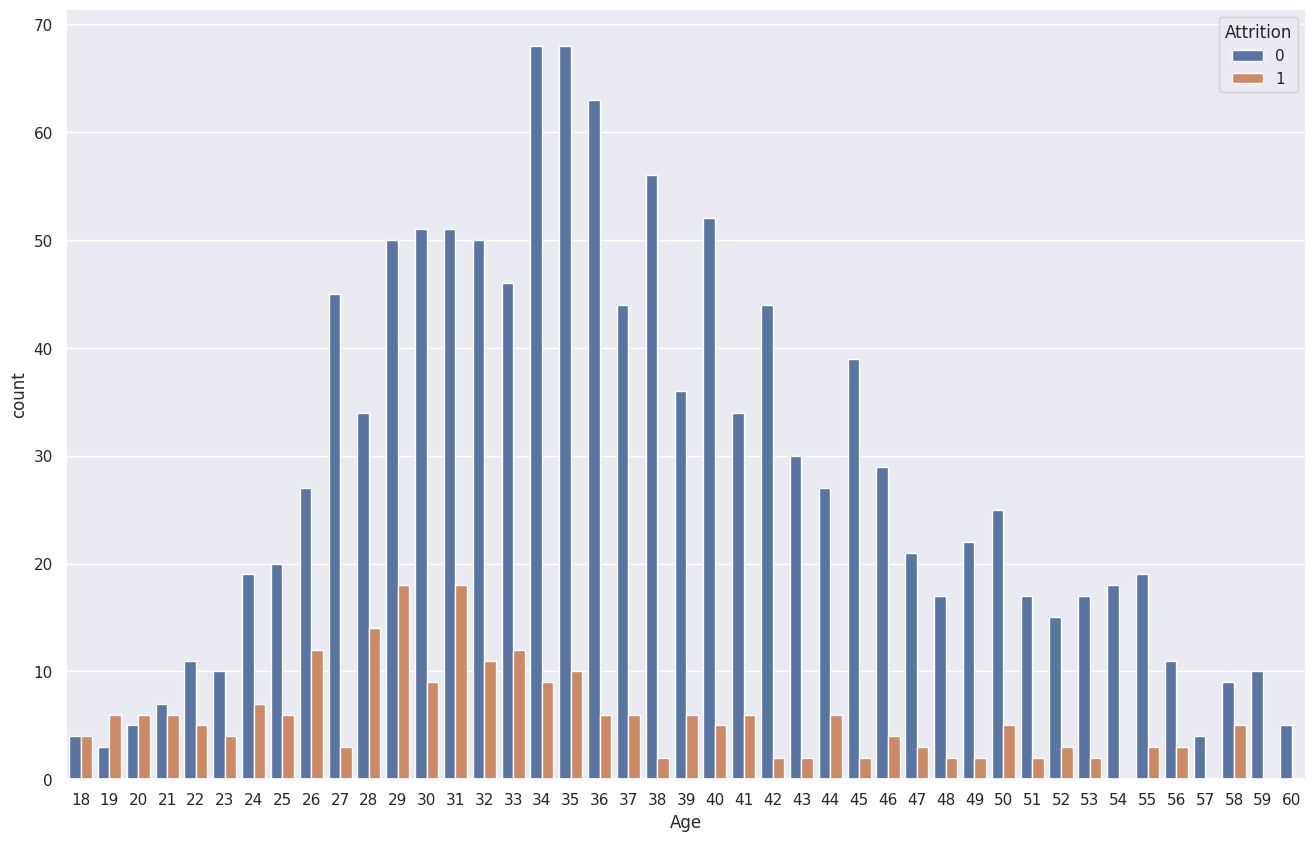

In [27]:
plt.figure(figsize=(16, 10))
sns.countplot(x='Age', hue='Attrition', data=df)
plt.show()

In [28]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

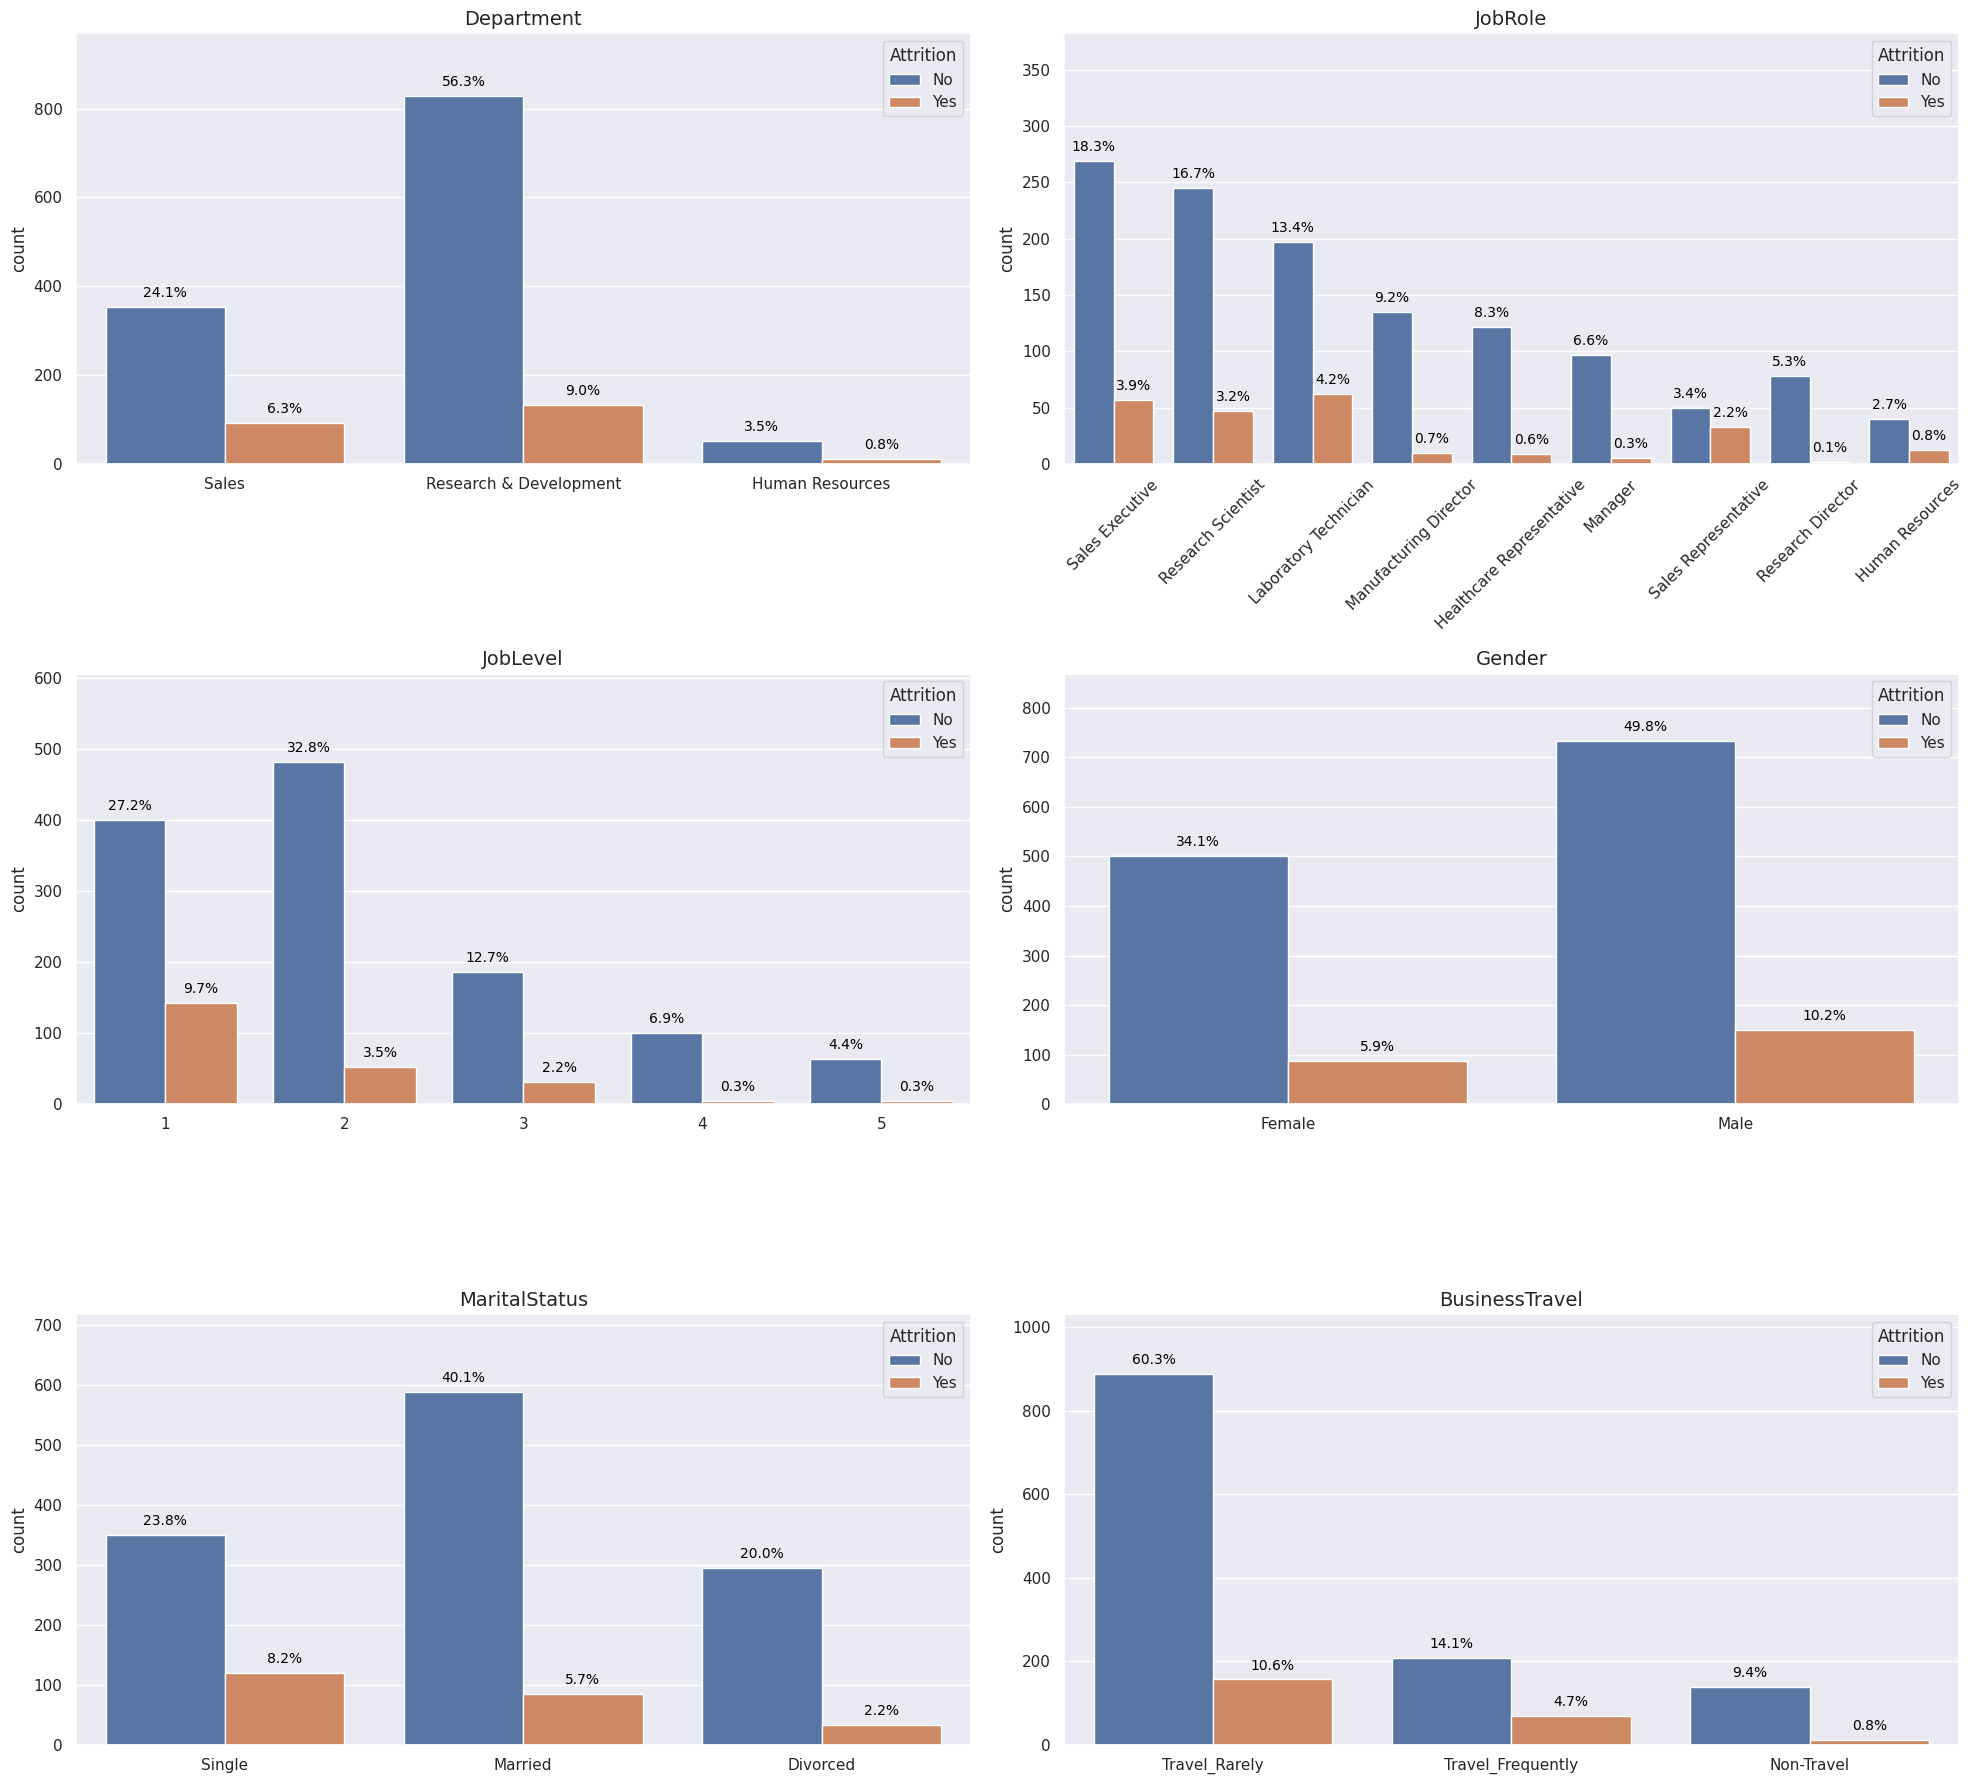

In [29]:
plt.figure(figsize=(20, 18))
cols = ['Department', 'JobRole', 'JobLevel', 'Gender', 'MaritalStatus', 'BusinessTravel']

for i, column in enumerate(cols, 1):
    plt.subplot(3, 2, i)
    ax = sns.countplot(data=df, x=column, hue="Attrition")
    plt.ylim(0, ax.get_ylim()[1] + 100)
    plt.title(f'{column}', fontsize=14)
    plt.xlabel("")
    plt.legend(title='Attrition', labels=['No', 'Yes'])
    if column == 'JobRole':
      plt.xticks(rotation=45)


    # Iterate through the containers to access patches for each bar
    for container in ax.containers:
        labels = [f'{p.get_height()/df[column].count()*100:.1f}%' for p in container]
        ax.bar_label(container, labels=labels, fontsize=10, color='black', padding=5)


plt.tight_layout()
plt.show()

In [30]:
df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

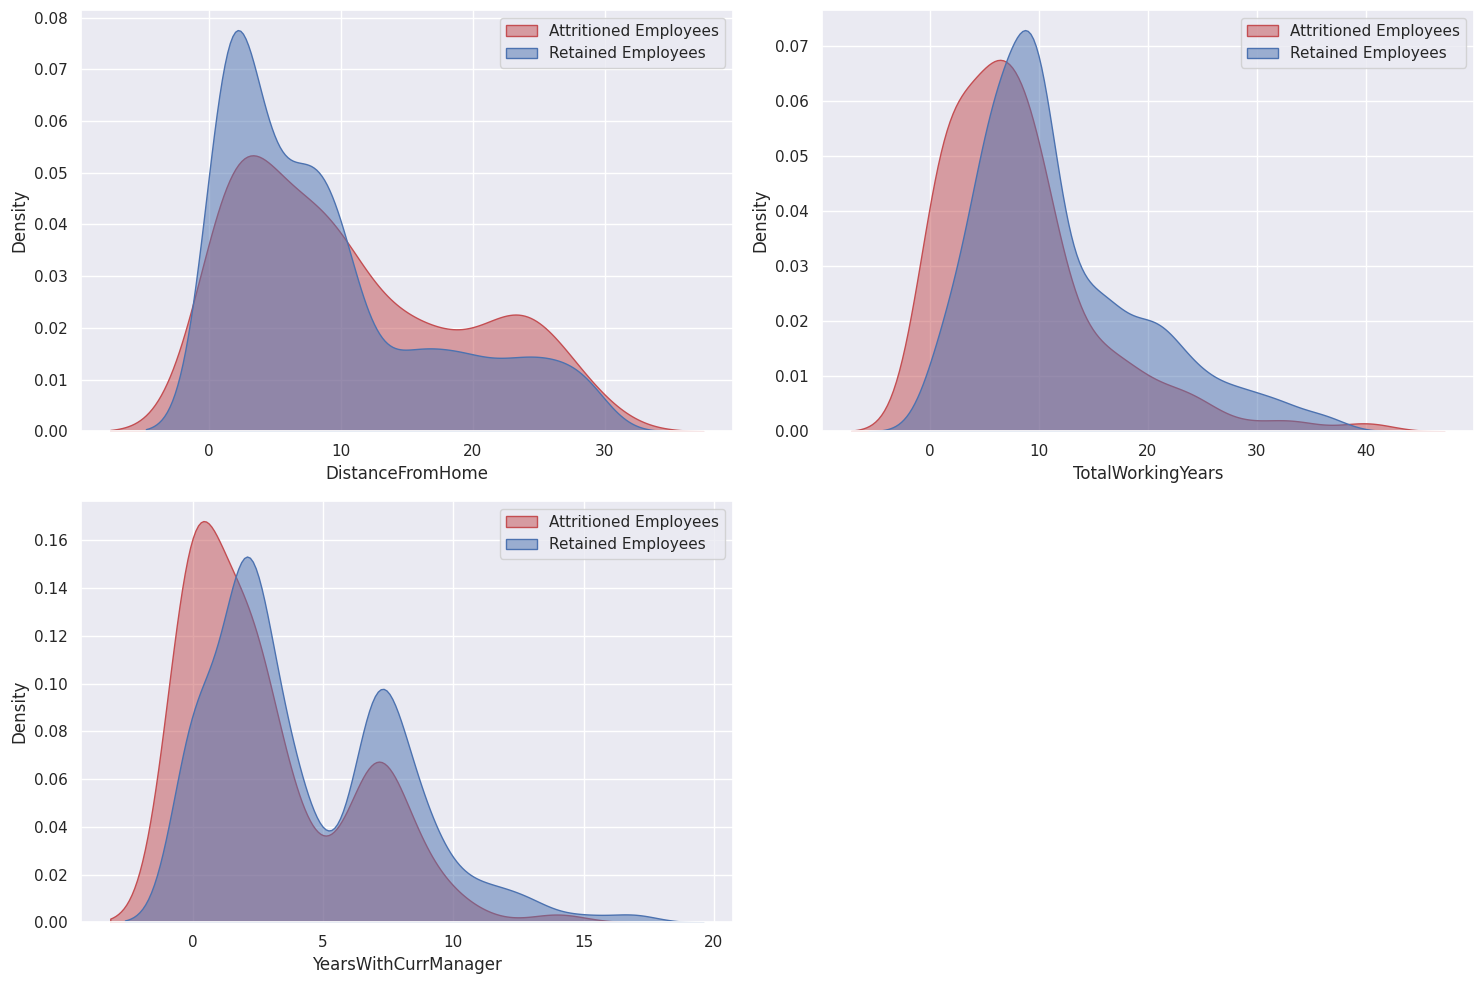

In [31]:
plt.figure(figsize=(15, 10))

cols = ['DistanceFromHome', 'TotalWorkingYears', 'YearsWithCurrManager']

for i, column in enumerate(cols, 1):
  plt.subplot(2, 2, i)
  sns.kdeplot(quit_df[column], label='Attritioned Employees', fill=True, color='r', alpha=0.5)
  sns.kdeplot(stayed_df[column], label='Retained Employees', fill=True, color='b', alpha=0.5)
  plt.xlabel(f"{column}")
  plt.legend()


plt.tight_layout()
plt.show()

- The density curve for retained employees (blue) is generally higher at shorter distances, indicating that employees who stay are more concentrated closer to the workplace.

- Retained employees generally have a broader distribution across a longer range of working years, peaking around 10 years.
Attritioned employees show a higher density at lower total working years, indicating that employees with fewer total working years are more likely to leave.

- Attritioned employees have a higher density at lower values of YearsWithCurrManager, with a peak at around 1-2 years.
Retained employees show a more distributed range of YearsWithCurrManager, suggesting that longer tenure with the current manager correlates with retention.

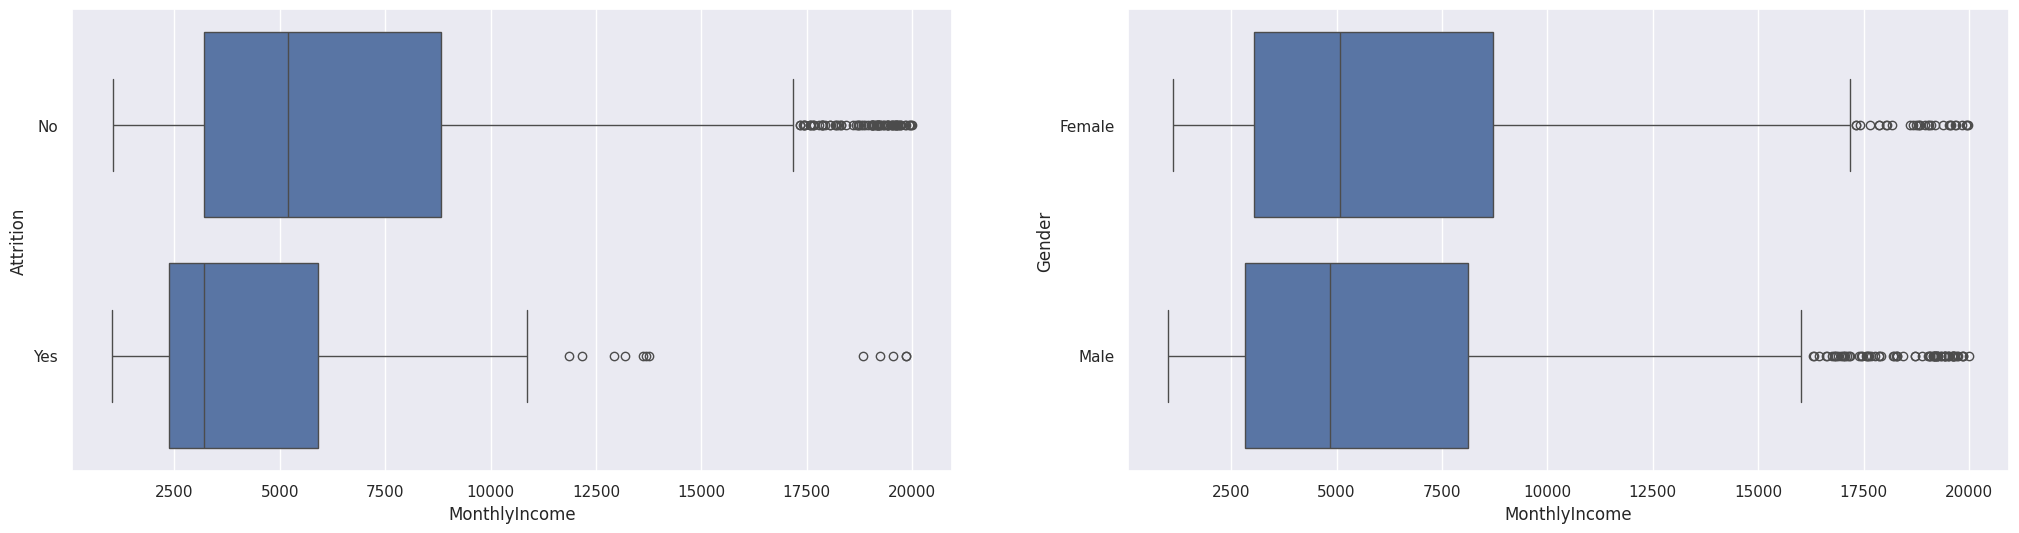

In [32]:
plt.figure(figsize=(25, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y='Attrition', x='MonthlyIncome', data=df, orient='h')
plt.yticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.subplot(1, 2, 2)
sns.boxplot(y='Gender', x='MonthlyIncome', data=df, orient='h')
# plt.yticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

- Higher monthly income seems to correlate with employee retention, as those who leave tend to have lower median incomes.
- Gender does not exhibit a significant discrepancy in monthly income distribution, although males have a marginally higher median.

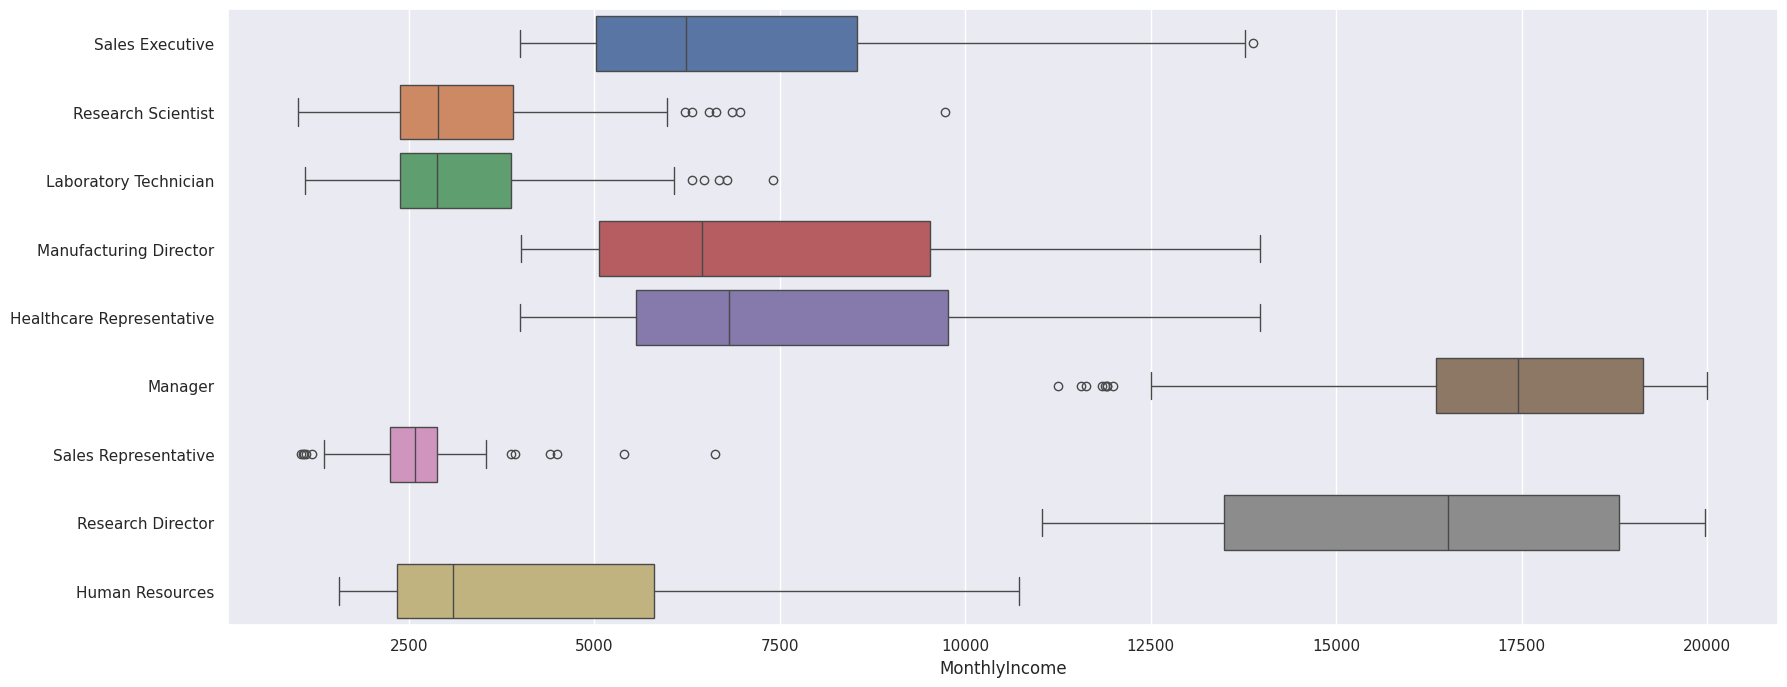

In [33]:
plt.figure(figsize=(20, 8))
sns.boxplot(y='JobRole', x='MonthlyIncome', data=df, orient='h', hue='JobRole')
plt.ylabel('')
plt.show()

Research Scientists, Lab Technicians, Sales Representatives, and Human Resources employees have noticeably lower monthly incomes compared to other job roles, which may increase their likelihood of attrition.

# Data Preparation for Modelling

In [34]:
# create dummies for categorical data
df_with_dummies = pd.get_dummies(df, drop_first=True, dtype=int)

In [35]:
df_with_dummies.sample(2)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
1089,37,0,674,13,3,1,47,3,2,4,4285,3031,1,17,3,1,0,10,2,3,10,8,3,7,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
1400,38,0,1444,1,4,4,88,3,1,2,2991,5224,0,11,3,2,1,7,2,3,6,2,1,2,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0


### Data standardization

In [36]:
y = df_with_dummies['Attrition']
X = df_with_dummies.drop('Attrition', axis=1)

In [37]:
# data scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [38]:
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns)

### Split data

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [41]:
X_train.shape

(1176, 43)

In [42]:
X_test.shape

(294, 43)

## Multicollinearity checking

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
def check_vif(train):
  vif = pd.DataFrame()
  vif["feature"] = train.columns
  vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
  return vif

In [45]:
vifs = check_vif(X_train)
vifs.sort_values(by='VIF', ascending=False)

,feature,VIF
25,Department_Research & Development,47.532070
26,Department_Sales,45.941606
27,EducationField_Life Sciences,24.096731
29,EducationField_Medical,21.419288
9,MonthlyIncome,18.513533
7,JobLevel,14.783317
39,JobRole_Sales Executive,14.461847
28,EducationField_Marketing,10.631352
31,EducationField_Technical Degree,8.574856
33,JobRole_Human Resources,7.949174


Since 'Departments' is highly correlated with 'Job Role' (correlation of 1) and 'Education Field' (0.88), I'll remove 'Departments' and 'Education Field' to reduce VIF values, assuming that 'Job Role' already captures information about the department and education. Additionally, I will exclude 'Job Level' because it shows strong correlations with 'Total Working Years' (0.87), 'Years at Company' (0.69), and 'Monthly Income' (0.99).

Furthermore, categories like 'Years at Company', 'Years in Current Role', 'Years Since Last Promotion', and 'Years with Current Manager' are closely related. Given that 'Years with Current Manager' likely overlaps with 'Years in Current Role', I'll drop at least one of these categories


In [46]:
X_train_multy_check = X_train.drop(['Department_Research & Development',
                                    'Department_Sales',
                                    'EducationField_Life Sciences',
                                    'EducationField_Medical',
                                    'EducationField_Marketing',
                                    'EducationField_Other',
                                    'EducationField_Technical Degree',
                                    'JobLevel',
                                    'TotalWorkingYears',
                                    'YearsInCurrentRole',
                                    'MonthlyRate',
                                    'HourlyRate',
                                    'DailyRate'], axis=1)
vifs = check_vif(X_train_multy_check)
vifs.sort_values(by='VIF', ascending=False)

,feature,VIF
6,MonthlyIncome,7.013592
14,YearsAtCompany,3.551515
25,JobRole_Research Scientist,3.413605
22,JobRole_Manager,3.205538
21,JobRole_Laboratory Technician,3.139247
29,MaritalStatus_Single,2.877838
26,JobRole_Sales Executive,2.743554
24,JobRole_Research Director,2.684324
16,YearsWithCurrManager,2.526251
18,BusinessTravel_Travel_Rarely,2.518425


# Logistic Regression


In [47]:
import statsmodels.api as sm
x1 = sm.add_constant(X_train_multy_check)
sm_log = sm.Logit(y_train, x1)
sm_log.fit().summary()

Optimization terminated successfully.
         Current function value: 0.344926
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1145
Method:                           MLE   Df Model:                           30
Date:                Thu, 21 Nov 2024   Pseudo R-squ.:                  0.2391
Time:                        21:03:24   Log-Likelihood:                -405.63
converged:                       True   LL-Null:                       -533.07
Covariance Type:            nonrobust   LLR p-value:                 1.738e-37
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.2747      0.127    -17.883      0.000      -2.524      -2.025
Age                                 -0.3332      0.115     -2.899      0.004      -0.558      -0.108
DistanceFromHome                     0.3119      0.088      3.557      0.000       0.140       0.484
Education                            0.0426      0.091      0.467      0.640      -0.136       0.222
EnvironmentSatisfaction             -0.2843      0.091     -3.131      0.002      -0.462      -0.106
JobInvolvement                      -0.3275      0.090     -3.637      0.000      -0.504      -0.151
JobSatisfaction                     -0.3796      0.090     -4.202      0.000      -0.557      -0.203
MonthlyIncome                        0.1015      0.261      0.388      0.698      -0.411       0.614
NumCompaniesWorked                   0.4104      0.094      4.345      0.000       0.225       0.595
PercentSalaryHike                   -0.0889      0.143     -0.622      0.534      -0.369       0.191
PerformanceRating                    0.0484      0.141      0.343      0.732      -0.228       0.325
RelationshipSatisfaction            -0.0653      0.091     -0.721      0.471      -0.243       0.112
StockOptionLevel                    -0.1681      0.136     -1.234      0.217      -0.435       0.099
TrainingTimesLastYear               -0.2243      0.095     -2.350      0.019      -0.411      -0.037
WorkLifeBalance                     -0.2486      0.091     -2.731      0.006      -0.427      -0.070
YearsAtCompany                       0.1696      0.205      0.827      0.408      -0.232       0.571
YearsSinceLastPromotion              0.3998      0.136      2.946      0.003       0.134       0.666
YearsWithCurrManager                -0.5863      0.167     -3.505      0.000      -0.914      -0.258
BusinessTravel_Travel_Frequently     0.7088      0.169      4.191      0.000       0.377       1.040
BusinessTravel_Travel_Rarely         0.4627      0.183      2.524      0.012       0.103       0.822
Gender_Male                          0.1405      0.092      1.531      0.126      -0.039       0.320
JobRole_Human Resources              0.4290      0.121      3.541      0.000       0.192       0.667
JobRole_Laboratory Technician        0.8511      0.214      3.975      0.000       0.431       1.271
JobRole_Manager                      0.0756      0.219      0.344      0.731      -0.354       0.506
JobRole_Manufacturing Director       0.1869      0.190      0.982      0.326      -0.186       0.560
JobRole_Research Director           -0.1117      0.223     -0.500      0.617      -0.550       0.326
JobRole_Research Scientist           0.6828      0.224      3.050      0.002       0.244       1.122
JobRole_Sales Executive              0.7301      0.216      3.385      0.001       0.307       1.153
JobRole_Sales Representative         0.6580      0.140      4.706      0.000       0.384       0.932
MaritalSt

Based on this dataset, the p-values for the following variables are greater than 0.05:

---
- 'YearsAtCompany',
- 'StockOptionLevel',
- 'RelationshipSatisfaction',
- 'PerformanceRating',
- 'PercentSalaryHike',
-  'Education',
-  'MaritalStatus_Married',
- 'Gender_Male',
- 'JobRole_Manager',
- 'JobRole_Manufacturing Director',
- 'JobRole_Research Director'
---

This indicates that their coefficients are not significantly different from zero and do not contribute explanatory power to the model. Therefore, I will remove them.

In [48]:
X_train_clean = X_train_multy_check.drop(['MonthlyIncome',
                                          'YearsAtCompany',
                                          'StockOptionLevel',
                                          'RelationshipSatisfaction',
                                          'PerformanceRating',
                                          'PercentSalaryHike',
                                          'Education',
                                          'MaritalStatus_Married',
                                          'Gender_Male',
                                          'JobRole_Manager',
                                          'JobRole_Manufacturing Director',
                                          'JobRole_Research Director'], axis=1)

In [49]:
x1 = sm.add_constant(X_train_clean)
sm_log = sm.Logit(y_train, x1)
sm_log.fit().summary()

Optimization terminated successfully.
         Current function value: 0.348931
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1157
Method:                           MLE   Df Model:                           18
Date:                Thu, 21 Nov 2024   Pseudo R-squ.:                  0.2302
Time:                        21:03:24   Log-Likelihood:                -410.34
converged:                       True   LL-Null:                       -533.07
Covariance Type:            nonrobust   LLR p-value:                 6.865e-42
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.2473      0.125    -18.033      0.000      -2.492      -2.003
Age                                 -0.2991      0.107     -2.799      0.005      -0.508      -0.090
DistanceFromHome                     0.2866      0.086      3.338      0.001       0.118       0.455
EnvironmentSatisfaction             -0.2813      0.090     -3.137      0.002      -0.457      -0.106
JobInvolvement                      -0.3372      0.089     -3.785      0.000      -0.512      -0.163
JobSatisfaction                     -0.3725      0.089     -4.170      0.000      -0.548      -0.197
NumCompaniesWorked                   0.3811      0.091      4.167      0.000       0.202       0.560
TrainingTimesLastYear               -0.2396      0.094     -2.537      0.011      -0.425      -0.054
WorkLifeBalance                     -0.2538      0.090     -2.824      0.005      -0.430      -0.078
YearsSinceLastPromotion              0.4615      0.120      3.855      0.000       0.227       0.696
YearsWithCurrManager                -0.4955      0.130     -3.813      0.000      -0.750      -0.241
BusinessTravel_Travel_Frequently     0.7101      0.167      4.252      0.000       0.383       1.037
BusinessTravel_Travel_Rarely         0.4734      0.182      2.608      0.009       0.118       0.829
JobRole_Human Resources              0.3707      0.090      4.096      0.000       0.193       0.548
JobRole_Laboratory Technician        0.6974      0.126      5.553      0.000       0.451       0.944
JobRole_Research Scientist           0.5238      0.131      3.985      0.000       0.266       0.781
JobRole_Sales Executive              0.6070      0.132      4.608      0.000       0.349       0.865
JobRole_Sales Representative         0.5560      0.091      6.081      0.000       0.377       0.735
MaritalStatus_Single                 0.5525      0.086      6.414      0.000       0.384       0.721
====================================================================================================
"""

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [51]:
regr_model = LogisticRegression()
regr_model.fit(X_train_clean, y_train)

LogisticRegression()

### Performance of Testing

In [52]:
X_test_clean = X_test.drop(['YearsAtCompany',
                            'StockOptionLevel',
                            'RelationshipSatisfaction',
                            'PerformanceRating',
                            'PercentSalaryHike',
                            'Education',
                            'MaritalStatus_Married',
                            'Gender_Male',
                            'JobRole_Manager',
                            'JobRole_Manufacturing Director',
                            'JobRole_Research Director',
                            'Department_Research & Development',
                            'Department_Sales',
                            'EducationField_Life Sciences',
                            'EducationField_Medical',
                            'EducationField_Marketing',
                            'EducationField_Other',
                            'EducationField_Technical Degree',
                            'JobLevel',
                            'TotalWorkingYears',
                            'YearsInCurrentRole',
                            'MonthlyRate',
                            'HourlyRate',
                            'DailyRate',
                            'MonthlyIncome'], axis=1)

In [53]:
y_pred = regr_model.predict(X_test_clean)

In [54]:
print(f"Accuracy: {100*accuracy_score(y_test, y_pred)}")

Accuracy: 86.05442176870748


The model correctly predicts whether an employee will stay or leave 87.41% of the time. However, given that retained employees dominate the dataset , accuracy alone might not be the best metric for understanding model effectiveness, particularly in predicting attrition.

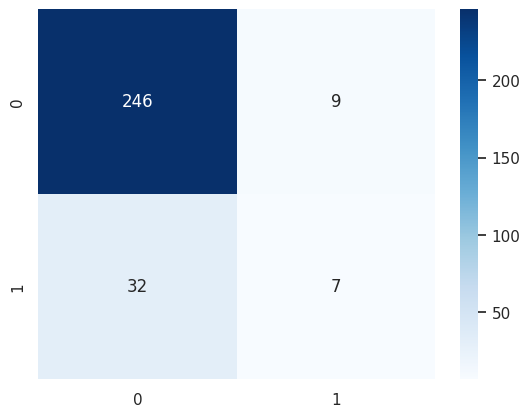

In [55]:
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

The model has a relatively low number of false positives.

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       255
           1       0.44      0.18      0.25        39

    accuracy                           0.86       294
   macro avg       0.66      0.57      0.59       294
weighted avg       0.83      0.86      0.83       294



Class 0 (Retained Employees):

- Precision (0.88): 88% of employees predicted to stay actually stayed.
- Recall (0.96): The model correctly identified 96% of the employees who stayed.
- F1-score (0.92): This high F1-score suggests the model has a strong ability to accurately predict retained employees, with a good balance between precision and recall.


---


Class 1 (Attritioned Employees):

- Precision (0.44): When the model predicts that an employee will leave, it is correct 44% of the time. This means that over half of the predictions for attrition are false positives.
- Recall (0.18): The model only correctly identifies 18% of employees who actually left, meaning it misses the majority of actual attrition cases. This low recall is a significant concern as it indicates the model fails to detect most attrition cases.
- F1-score (0.25): This low F1-score indicates a poor balance between precision and recall when predicting attrition, highlighting the model's struggle to accurately identify employees who leave.

Trying more advanced models (e.g., Random Forests) may enhance performance

# Random Forest Classifier Model

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
# Extracting feature importance
importances = forest_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

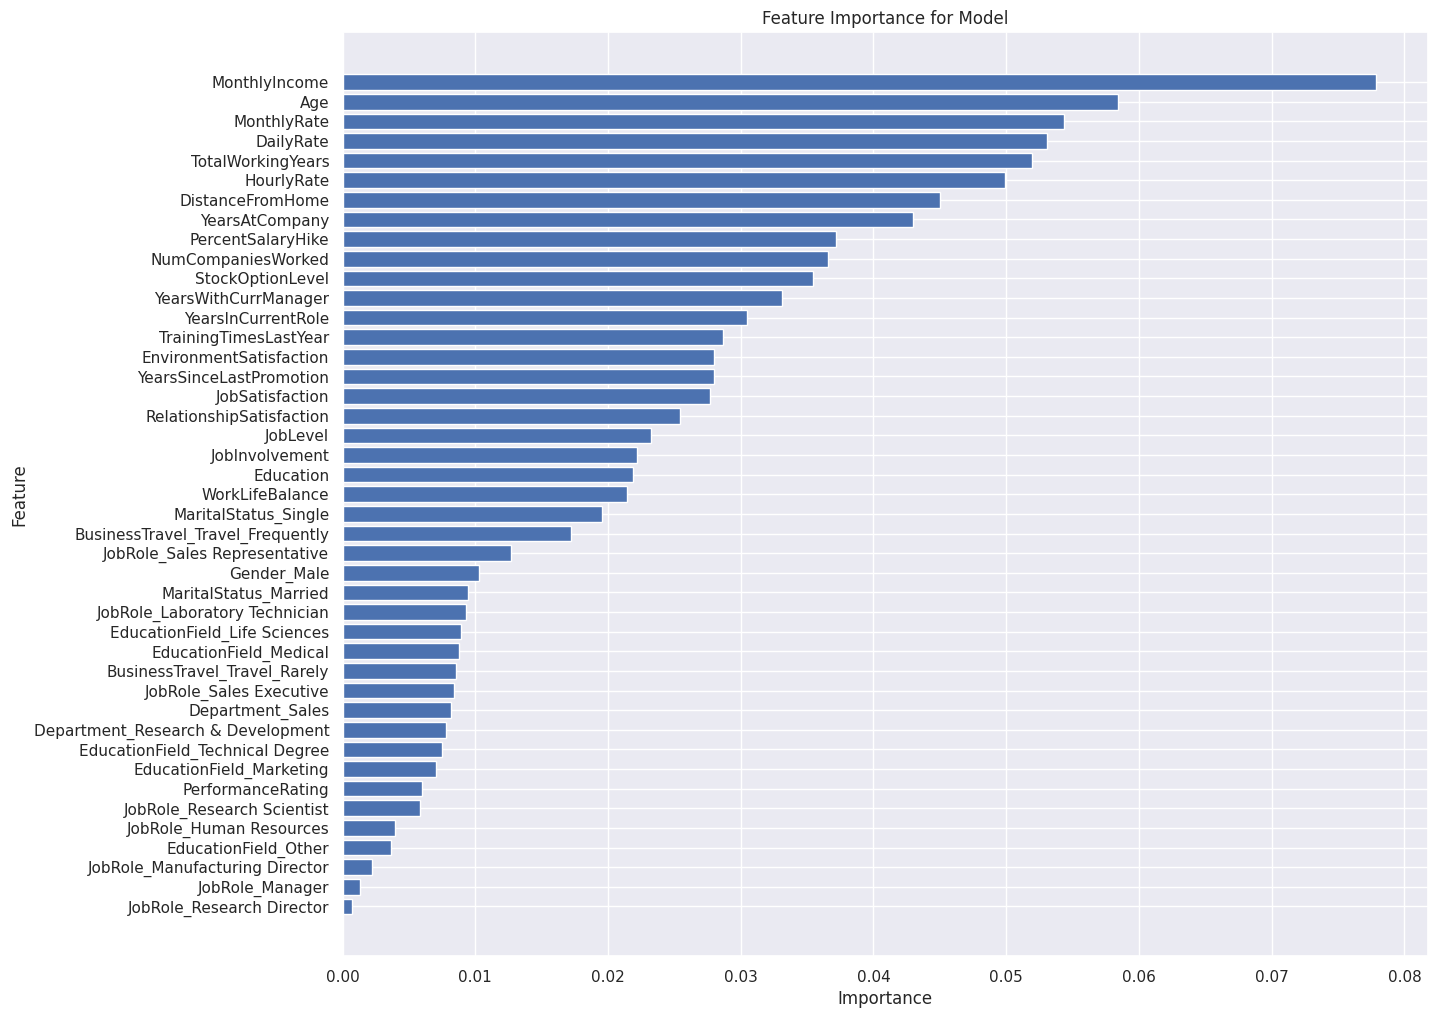

In [60]:
plt.figure(figsize=(14, 12))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance for Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Features like MonthlyIncome, Age, and MonthlyRate have the highest importance scores, indicating that these variables play the most significant roles in the model's predictions. The model relies heavily on these factors when making decisions about employee attrition.**

### Performance Testing

In [61]:
y_pred = forest_model.predict(X_test)

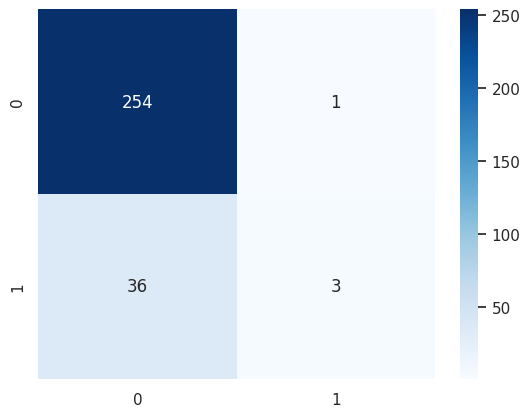

In [62]:
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.75      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.81      0.54      0.54       294
weighted avg       0.86      0.87      0.83       294



Recall for Attrition (Class 1) remains critically low at 0.08, suggesting that the model is missing most of the employees who actually left. This is a significant issue for HR decision-making, as it means the model lacks sensitivity in identifying potential leavers.

False Negatives (36 employees) are high, indicating that the model does not sufficiently catch the risk of attrition, which can be costly if proactive measures are not taken.

# Deep Learning Model

In [64]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=500, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 500)                 │          22,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 774,001 (2.95 MB)

 Trainable params: 774,001 (2.95 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [67]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.8255 - loss: 0.4847
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8355 - loss: 0.3650
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8845 - loss: 0.2991
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9086 - loss: 0.2132
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9498 - loss: 0.1394
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9531 - loss: 0.1050
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9788 - loss: 0.0641
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9697 - loss: 0.0849
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9844 - loss: 0.0380
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9944 - loss: 0.0183
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9857 - loss: 0.0382
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

### Performance Testing

In [68]:
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [69]:

y_pred = (y_pred > 0.5).astype(int)

Text(0.5, 0, 'Epoch')

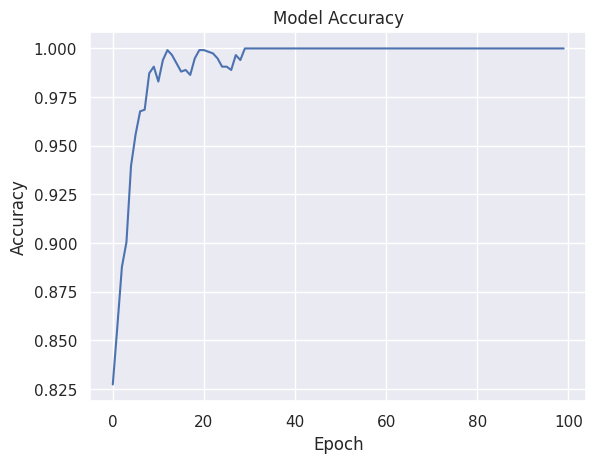

In [70]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

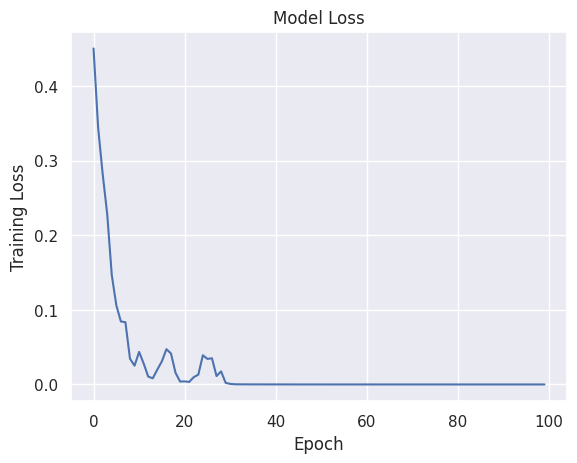

In [71]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('Training Loss')
plt.xlabel('Epoch')

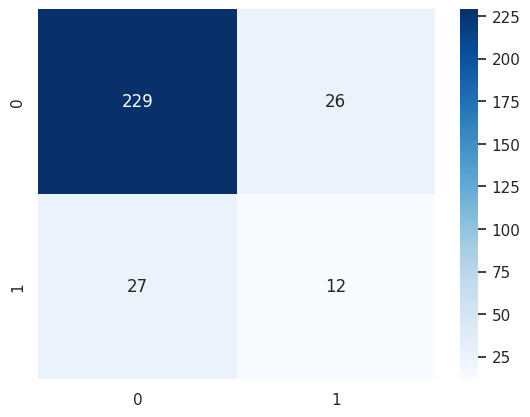

In [72]:
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       255
           1       0.32      0.31      0.31        39

    accuracy                           0.82       294
   macro avg       0.61      0.60      0.60       294
weighted avg       0.82      0.82      0.82       294



Class 0 (Retained Employees):

- Precision: 0.89 — 89% of predictions for employees staying were correct.
- Recall: 0.93 — 93% of the actual employees who stayed were correctly predicted.
- F1-score: 0.91 — A high score, indicating good precision and recall balance for predicting retained employees.


---


Class 1 (Attritioned Employees):

- Precision: 0.39 — Only 39% of predictions for employees leaving were correct, meaning a high number of false positives.
- Recall: 0.28 — Only 28% of actual attrition cases were correctly predicted, meaning the model is missing many cases of actual attrition.
- F1-score: 0.33 — A low score, showing the model struggles with predicting attrition accurately.


---


Overall Performance:

- Accuracy: 0.85 — The model is 83% accurate overall, primarily driven by its performance in predicting retained employees.
- Macro Average: 0.62 — Averages precision, recall, and F1-score across both classes without weighting by class size.
- Weighted Average: 0.84 — Averages the metrics while accounting for class imbalance, indicating better performance in predicting the majority class (Class 0).

**The class imbalance, with significantly more retained employees than those who leave, has negatively impacted the performance of all models used (logistic regression, random forest, and a deep learning model). This imbalance leads to poor predictive accuracy for attritioned employees, as the models tend to favor the majority class (retained employees). To address this issue, it's crucial to gather more information about attritioned employees, which could improve the models' ability to identify patterns specific to those who leave.**








**In conclusion, several factors play a significant role in predicting employee attrition based on the Logistic model results.**

- **Key variables like Job Involvement, Job Satisfaction, Work-Life Balance, and Environment Satisfaction show strong statistical significance in the model (p-values < 0.05). Monitoring these parameters could provide valuable insights into employees' intentions to leave their jobs.**

- **Negative coefficients, like those for Age (-0.2991) and JobSatisfaction (-0.3725), suggest that higher values of these variables are associated with lower likelihoods of attrition.**

- **In contrast, positive coefficients, such as for NumCompaniesWorked (0.3811) and YearsSinceLastPromotion (0.4615), suggest that these factors are positively correlated with employee retention. Therefore, it is beneficial to implement regular promotion practices or, at the very least, ensure the promotion process and its criteria are transparent and well-defined.**

- **Job roles such as Human Resources, Sales Representative, Laboratory Technician, and Research Scientist, which have lower average monthly incomes, are more likely to experience employee attrition. Introducing a bonus program for these positions could help improve employee loyalty and reduce turnover.**

**These insights are crucial for targeted interventions and workforce planning**

# Balancing data

Let's try to reduce class imbalance

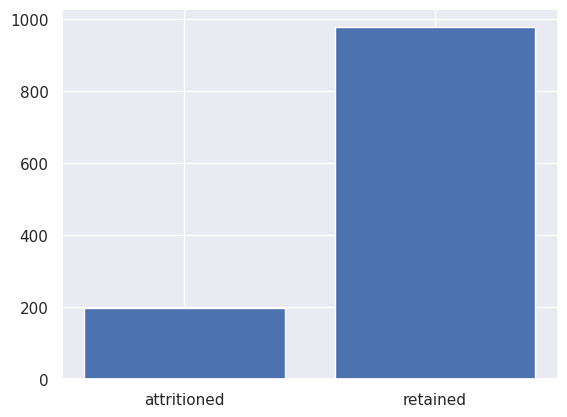

In [74]:
attritioned = y_train[y_train == 1].count()
retained = y_train[y_train == 0].count()

plt.bar(['attritioned', 'retained'], [attritioned, retained])
plt.show()

In [75]:
# Apply SMOTE to Train Data

from imblearn.over_sampling import SMOTE

In [76]:
smote = SMOTE(sampling_strategy=0.6, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

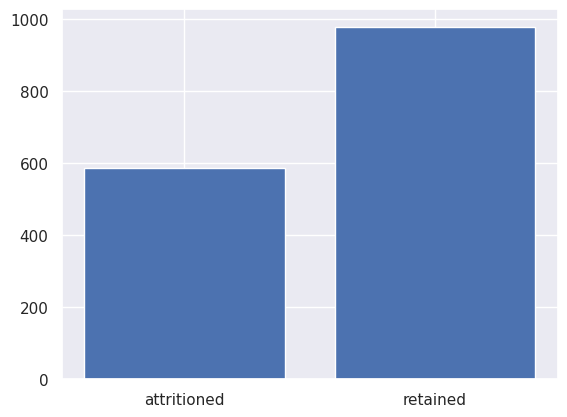

In [77]:
attritioned = y_train_resampled[y_train_resampled == 1].count()
retained = y_train_resampled[y_train_resampled == 0].count()

plt.bar(['attritioned', 'retained'], [attritioned, retained])
plt.show()

In [78]:
# Undersampling retained class

In [79]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy=0.85)

In [80]:
X_train_resampled, y_train_resampled = under.fit_resample(X_train_resampled, y_train_resampled)

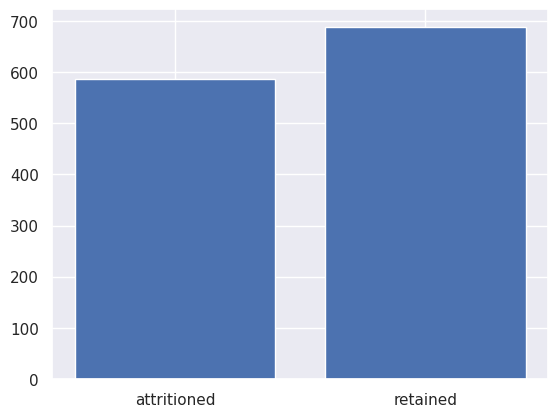

In [81]:
attritioned = y_train_resampled[y_train_resampled == 1].count()
retained = y_train_resampled[y_train_resampled == 0].count()

plt.bar(['attritioned', 'retained'], [attritioned, retained])
plt.show()

## Random Forest Classifier Model (after resampling)

In [82]:
# Training the Model on Resampled Data
f_model = RandomForestClassifier(random_state=42)
f_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [83]:
# Extracting feature importance
importances = f_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

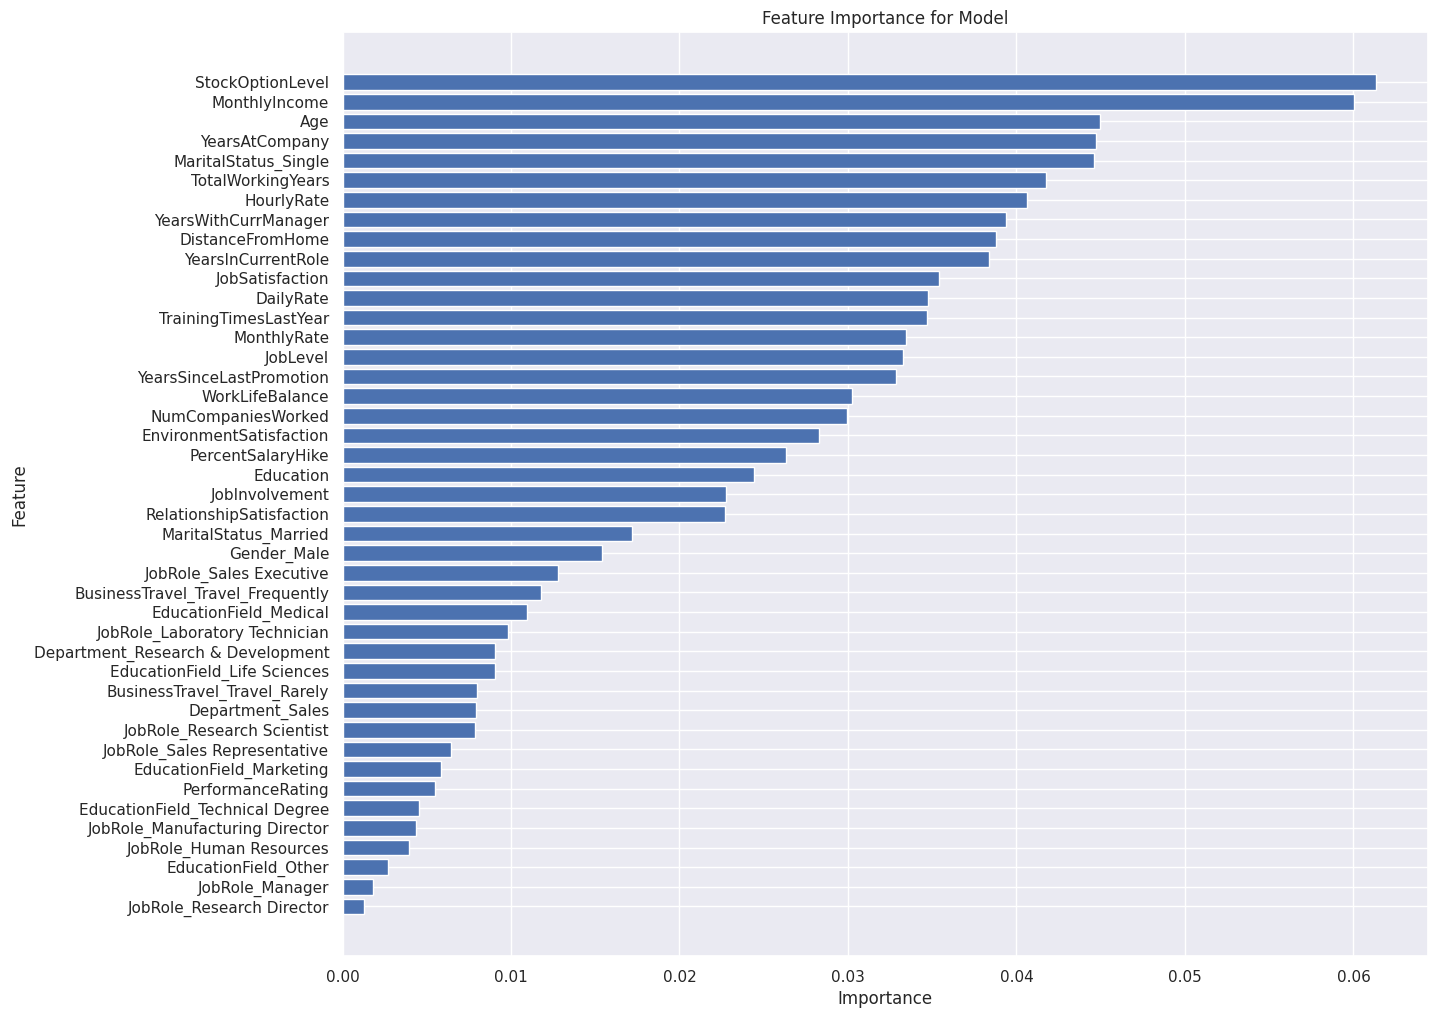

In [84]:
plt.figure(figsize=(14, 12))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance for Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Performance Testing

In [85]:
# Predicting on Test Data
y_pred = f_model.predict(X_test)

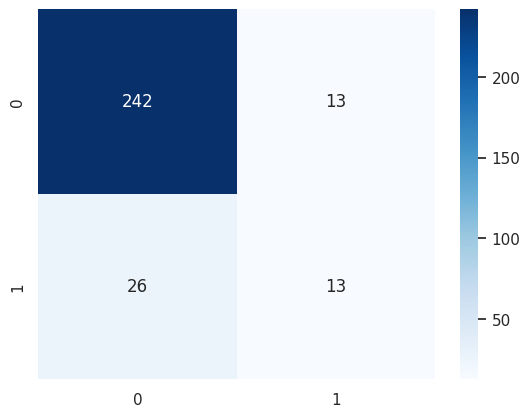

In [86]:
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [87]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       255
           1       0.50      0.33      0.40        39

    accuracy                           0.87       294
   macro avg       0.70      0.64      0.66       294
weighted avg       0.85      0.87      0.86       294



Data balancing altered the feature importance for the model, making certain features, such as StockOptionLevel, more influential than Monthly Income. However, this adjustment did not significantly improve the model's performance, as it still only predicts 50% of the attritioned employees accurately.